<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [6]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
# from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 2: Generate Descriptive Statistics and Visualizations


<function matplotlib.pyplot.show(close=None, block=None)>

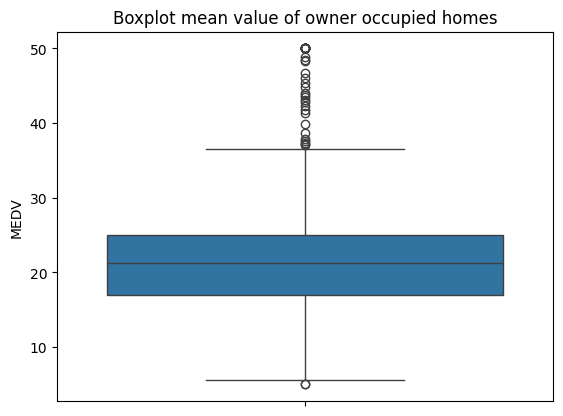

In [8]:
# For the "Median value of owner-occupied homes" provide a boxplot

boxplot =sns.boxplot(y="MEDV", data=boston_df)
pyplot.title("Boxplot mean value of owner occupied homes")
pyplot.show

Text(0.5, 1.0, 'Bar plot for the Charles river variable')

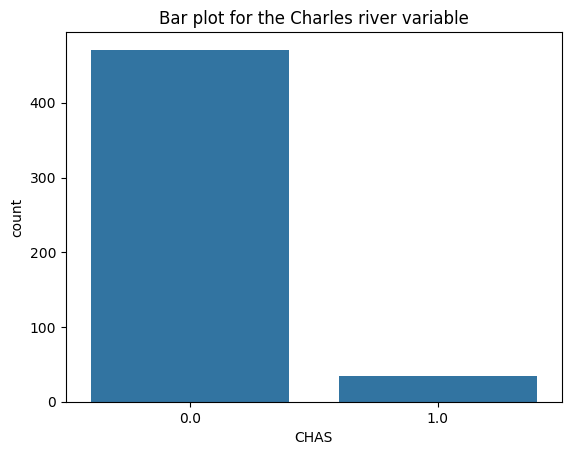

In [6]:
# Provide a  bar plot for the Charles river variable
BarPlot = sns.countplot(x='CHAS', data=boston_df) 
BarPlot.set_title("Bar plot for the Charles river variable")

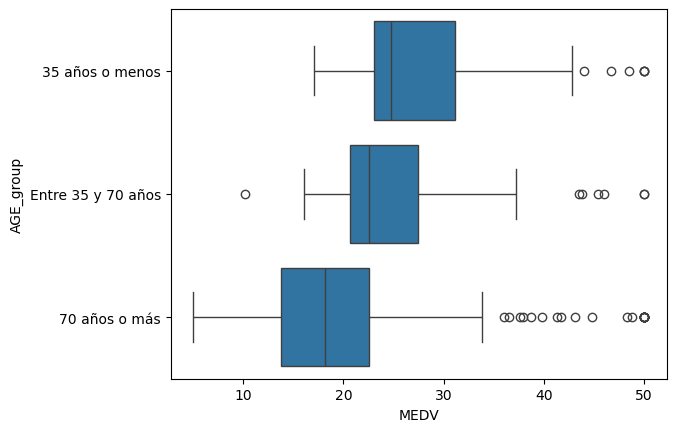

In [18]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 años o menos', 'Entre 35 y 70 años', '70 años o más'])

boxplot=sns.boxplot(x="MEDV", y="AGE_group", data=boston_df)


Text(0.5, 1.0, 'Scatter plot')

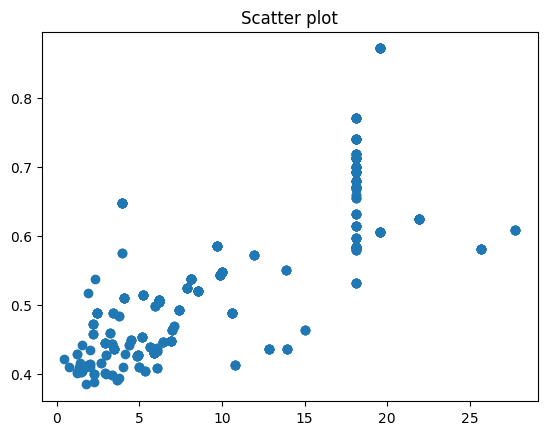

In [9]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship
pyplot.scatter(boston_df["INDUS"],boston_df["NOX"])
pyplot.show
pyplot.title("Scatter plot")

array([[<AxesSubplot:title={'center':'PTRATIO'}>]], dtype=object)

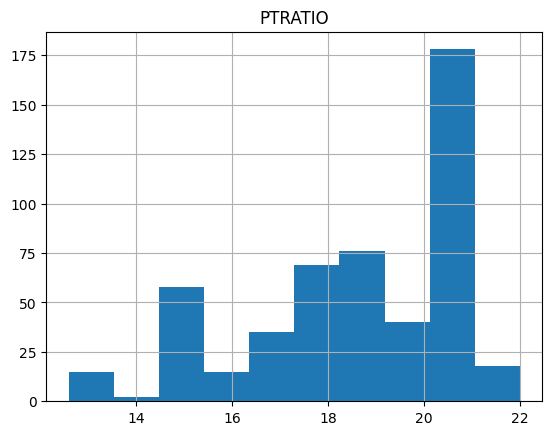

In [10]:
#Create a histogram for the pupil to teacher ratio variable
boston_df.hist("PTRATIO")

### Task 3: Use the appropriate tests to answer the questions provided.

In [12]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#Sí, hay una diferencia significativa en el valor mediano de las casas ubicadas junto al río Charles en comparación con aquellas que no lo están. Esto se determina mediante un T-test para muestras independientes, donde el resultado muestra un estadístico de -3.996 y un valor p de 7.390, lo que indica que la diferencia observada es estadísticamente significativa.

boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'NEAR'
boston_df.head(5)

scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], 
                      boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [13]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#Sí, hay una diferencia en los valores medianos de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)

from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)


             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


In [18]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#No podemos concluir que no hay relación entre nitric oxide concentrations y la proportion of non-retail business acres per town.

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])



PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [16]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
#La distance to five Boston employment centres on the median value of owner occupied homes tiene un impacto significativo en el valor mediano de las viviendas ocupadas por sus propietarios. Por cada unidad adicional de distancia ponderada, el valor mediano de las viviendas aumenta en aproximadamente $1.09, según el análisis de regresión. Además, incluso cuando la distancia ponderada es cero, el valor mediano de las viviendas sigue siendo significativamente alto, con un valor constante de aproximadamente $18.39. Sin embargo, la distancia ponderada solo explica alrededor del 6.2% de la variabilidad en el valor mediano de las viviendas.
#la distancia ponderada solo explica alrededor del 6.2% de la variabilidad en el valor mediano de las viviendas.

x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 05 May 2024   Prob (F-statistic):           1.21e-08
Time:                        19:06:49   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""